Sports Athletes Classifier

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# test image
img = cv2.imread('C://users/sameer/desktop/sportspersonalityclassifier/dataset/cristiano ronaldo/2Q__ (1).jpg') 
img.shape


(225, 225, 3)

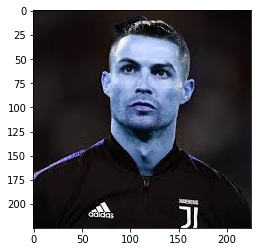

In [3]:
plt.imshow(img)

In [4]:
gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gry_img.shape

(225, 225)

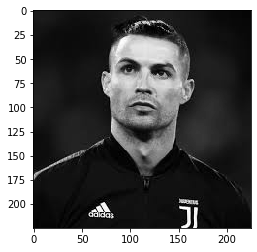

In [5]:
plt.imshow(gry_img,cmap = 'gray')

In [6]:
# Face detection using HAAR cascade
face_cascade = cv2.CascadeClassifier('C://users/sameer/desktop/sportspersonalityclassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('C://users/sameer/desktop/sportspersonalityclassifier/model/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gry_img,1.3,5)
faces
# The array indicates the location of points which will make a rectangle around the face.
# The points are determined by the cascade classifier

array([[ 62,  20, 108, 108]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0] # x,y coordinate, width, height
x,y,w,h

(62, 20, 108, 108)

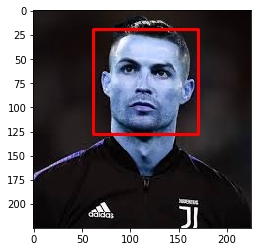

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#(image,starting coordinate,diagonal opposite,red)
plt.imshow(face_img)

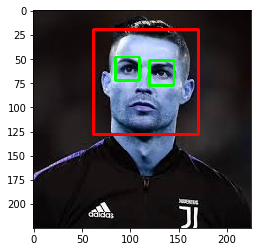

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gry_img[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eye_s = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eye_s:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

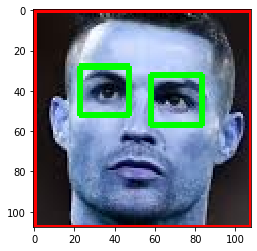

In [10]:
plt.imshow(roi_color,cmap='gray')

In [11]:
cropped_image = np.array(roi_color)
cropped_image.shape

(108, 108, 3)

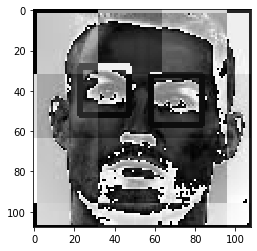

In [14]:
# Wavelet transformation of the test image
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
# Function to return a cropped image if face and 2 eyes are detected
def crop_img(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eye = eyes_cascade.detectMultiScale(roi_gray)
        if len(eye) >=2:
            return roi_color

In [16]:
path_to_data = 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/'
path_to_cropped_data = 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/'

In [17]:
import os
img_dirs = []
for folders in os.scandir(path_to_data): #os.scandir will go through every folder in the directory
    if folders.is_dir():
        img_dirs.append(folders.path)

In [18]:
img_dirs

['C://users/sameer/desktop/sportspersonalityclassifier/dataset/ab de villiers',
 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cristiano ronaldo',
 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/khabib nurmagomedov',
 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/lewis hamilton',
 'C://users/sameer/desktop/sportspersonalityclassifier/dataset/roger federer']

In [19]:
# If crop folder does already exist, we will remove it (for multiple runs)
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data) # here it will make one

In [20]:
cropped_image_dirs = [] # Cropped folder path for cropped image directory
player_files_name_dict = {} # dic to store player name key and list of path to cropped images as its values
for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1] # select the last value in the list after split function
    print(player_name)
    player_files_name_dict[player_name] = []
    for files in os.scandir(img_dir):
        roi_color = crop_img(files.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + player_name # Naming cropped folder after each player
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Cropped images in: ',cropped_folder)
            
            cropped_file_name = player_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color) # Saving cropped images in the cropped file folder
            player_files_name_dict[player_name].append(cropped_file_path)
            count += 1

ab de villiers
Cropped images in:  C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers
cristiano ronaldo
Cropped images in:  C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/cristiano ronaldo
khabib nurmagomedov
Cropped images in:  C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/khabib nurmagomedov
lewis hamilton
Cropped images in:  C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/lewis hamilton
roger federer
Cropped images in:  C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/roger federer


In [86]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ab de villiers': ['C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers1.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers10.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers11.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers12.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers13.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers14.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers15.png',
  'C://users/sameer/desktop/sportspersonalityclassifier/dataset/cropped_images/ab de villiers\\ab de villiers16.png',
  'C://users/sameer/desktop/sportsperso

In [87]:
# Wavelet decay of image
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [88]:
# Since X,y are numerical therefore converting the names of sportsperson into a numerical form (coding)
sports_dict = {}
count = 0
for sportsperson in celebrity_file_names_dict.keys():
    sports_dict[sportsperson] = count
    count = count + 1
sports_dict

{'ab de villiers': 0,
 'cristiano ronaldo': 1,
 'khabib nurmagomedov': 2,
 'lewis hamilton': 3,
 'roger federer': 4}

In [89]:
X = [] # Images to be classified
y = [] # Name of the sportsperson the images to be classified in
for player_name, training_images in celebrity_file_names_dict.items():
    for training_image in training_images:
        image = cv2.imread(training_image)
        scalled_raw_image = cv2.resize(image,(32,32))
        image_har = w2d(image,'db1',5)
        scalled_har_image = cv2.resize(image_har,(32,32))
        #stacking arrays
        combined_image = np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_har_image.reshape(32*32,1)))
        X.append(combined_image)
        y.append(sports_dict[player_name])

In [90]:
len(X[0]) #pixels of the image

4096

In [91]:
len(X) # number of images

142

In [92]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(142, 4096)

In [93]:
X[0]

array([ 79.,  80., 186., ...,  14., 238., 206.])

In [94]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [95]:
# Example model - using Support vector machine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.627906976744186

In [97]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.50      0.91      0.65        11
           2       1.00      0.33      0.50         9
           3       0.67      0.77      0.71        13
           4       0.50      0.25      0.33         4

    accuracy                           0.63        43
   macro avg       0.73      0.55      0.57        43
weighted avg       0.72      0.63      0.61        43



In [98]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [99]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.727273,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.494949,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.747475,{'logisticregression__C': 1}


In [102]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma='auto',
                      kernel='linear', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
       

In [104]:
best_estimators['svm'].score(X_test,y_test)

0.627906976744186

In [105]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7209302325581395

In [106]:
best_estimators['random_forest'].score(X_test,y_test)

0.4186046511627907